# Classification of sentences using XGboost(XGB) and Stochastic Gradient descent(SGD)

In this notebook you have a complete pipeline of classification using some classifiers as well as parameter tuning  and complete evaluation of the classfiers

In [451]:
import pandas as pd
import numpy as np
import re
import spacy
from spacy.lang.en import English
from spacy import displacy
nlp = spacy.load('en_core_web_sm', disable=["ner", "textcat", "entity_ruler", "merge_noun_chunks", "merge_entities", "merge_subtokens"])

In [452]:
from IPython.display import Image
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import seaborn as sns
import matplotlib.pylab as plt
from warnings import filterwarnings
filterwarnings('ignore')


In [453]:
from xgboost import XGBClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import KFold
from nltk.corpus import stopwords
import string
from sklearn.preprocessing import FunctionTransformer

In [454]:
from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import SGDClassifier, LogisticRegression,LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC,LinearSVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

In [455]:
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro","collapse_phrases":False}

In [456]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_colwidth', 260)

# Read the data

In [457]:
dfModel= pd.read_json('../data/model.json')
dfModel.head(20)

,sentence,act,y
100000,"Finally, we provide examples where future progress can be made in the development of gray models.",provide,0
10021,"We demonstrate that an end-to-end deep learning model can successfully recover 3-dimensional atomic distortions of a variety of oxide perovskite materials from a single 2-dimensional experimental scanning transmission electron (STEM) micrograph, in the pro...",demonstrate,0
100210,We apply the SCMS first to the data set generated from the Voronoi model.,apply,0
100240,"We use a thermochemical and photochemical kinetics and transport model to investigate the effects of photochemistry and quenching on young, directly imaged planets.",use,0
100309,"To predict and interpret the polarisation from such observations, we have also developed an advanced polarimetric modelling capability, by incoroporating full polarised radiative transfer into our atmospheric modelling code VSTAR.",developed,0
100443,Here we use a one-dimensional photochemical model to study ozone distributions in these hypothetical O_(2)-rich atmospheres.,use,0
100468,We did numerical simulations by using the full three-body problem as a dynamical model.,did,0
100479,"Following the approach of the CHIMERA code (Line et al 2013; 2014), we employ a variety of inverse models for the problem of parameter estimation.",employ,0
100565,"Using our Doppler images to model the activity jitter and filter it out from the radial velocity (RV) curves, we obtain RV residuals with dispersions of 0.033 and 0.104 km s^(-1) for V819 Tau and V830 Tau, respectively.",obtain,0
10062,"<BR /> Aims: We aim to develop a simple physical model for cloud formation and transport, efficient and versatile enough that it can be used, in modular fashion for parameter optimization searches of exoplanet atmosphere spectra.",aim,0


In [458]:
dfModel.tail(20)

,sentence,act,y
99488,"We explore the model dependence on the disk viscosity and find that the spectral index reveals the water snow line for a wide range of conditions, with opposite trends when the emission is optically thin rather than thick.",explore,0
99543,"Using more realistic initial conditions obtained from a semi-analytical model, we found that the masses of the planets range from 1.18 M_(⊕) to 2.21 M_(⊕).",found,0
99558,"We use a photochemical model coupled to a 1D radiative-convective climate model to self-consistently study this effect in atmospheres with N_(2), CO_(2) and H_(2)O as the main constituents.",use,0
99561,We use a radiative transfer model to study the spectroscopic fingerprint of these atmospheres in transit observations with a focus on the capabilities of the James Webb Space Telescope.,use,0
99568,"In this paper we use the end-to-end instrument simulator EChOSim to model the currently discovered targets, to gauge which targets are observable and assess the EChO performances obtainable for each observing tier and time.",use,0
99649,We utilize these circulation models to aid in the interpretation of transmission spectra obtained using the Space Telescope Imaging Spectrograph (STIS) and Wide Field Camera 3 (WFC3) as a part of a large Hubble Space Telescope (HST) transmission spectral s...,utilize,0
99664,"Next, we present tracer-transport simulations in a 2D chemical-diffusion-advection model (Shia et al.",present,0
99667,"We show that the derived eddy diffusivity can depend strongly on the horizontal eddy mixing and chemistry, although the dependences are more complex than the analytic model predicts.",show,0
99750,We present a PYTHON package LDTK that automates the calculation of custom stellar limb-darkening (LD) profiles and model-specific limb-darkening coefficients using the library of PHOENIX-generated specific intensity spectra by Husser et al.,present,0
9978,<BR /> Aims: We aim to develop a simple model of the information content of asteroseismology and to characterize the ability and precision with which fundamental properties of stars can be estimated for different space missions.,aim,0


In [459]:
X=list(dfModel["sentence"])


In [460]:
y=np.array(list(dfModel["y"]))

In [461]:
from collections import Counter
category=Counter(y)
count=dict(category)

In [462]:
count

{0: 6458, 1: 412}

# Distribution of Samples 

Text(0.5, 1.0, 'Distribution of samples over different classes')

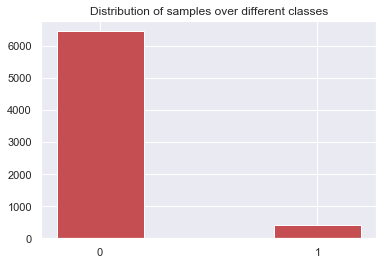

In [463]:
plt.bar(list(count.keys()),count.values(),color="r",width=.4,tick_label=["0","1"])
plt.title("Distribution of samples over different classes")


In [464]:
X,y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
X,y, test_size=0.25, random_state=42)    


In [465]:
len(y)

6870

# Baseline models

While training and buliding a model, we should keep in mind that there is never the best one. It is realtively experimental process. We start to try different trials. we tried different evaluation metrics

We have tried the following models:
- Multinomial Naïve Bayes
- XGBoosts classifier
- Random Forest
- Support Vector Machine
-  SGD Classifier


In [466]:
def train_predict(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    return y_pred

In [467]:
def cross_validation_accuracy(clf,X,y):
    scores = cross_val_score(clf, X, y, cv=3)
    print(scores)
    print('Accuracy of : {:.3f} ± {:.3f}'.format(np.mean(scores), 2 * np.std(scores)))

In [468]:
def Color_Confusion_Matrix(y, y_test, y_pred):
    cm=confusion_matrix(y_test, y_pred)
    l=len(set(y))
    df_cm = pd.DataFrame(cm, range(l), range(l))
    sns.set(font_scale=1)
    sns.heatmap(df_cm,cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')
    plt.ylabel('True label');
    plt.xlabel('Predicted label');
    plt.title("Confusion Matrix", size = 16)
    plt.savefig('CM_Test_01.png')

In [469]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score 
def plot_roc_curve(fpr, tpr,auc):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve with AUC {:.3f}'.format(AUC))
    plt.legend()
    plt.show()

# Models as trails for Classifcation

In [470]:
## 01-Naive Bayes
trial_1=Pipeline([ ('vectorizer', TfidfVectorizer()), ('classifier', MultinomialNB())])
################################################################################


## 02-XGBClassifier
trial_02 = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('clf', XGBClassifier())])
################################################################################
## 03-Random Forest Classifier
trial_03= Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('clf', RandomForestClassifier(n_estimators=1000, random_state=0))])

################################################################################
## 04-SVC Classifier
vec = TfidfVectorizer(min_df=3,ngram_range=(1, 2))
svd = TruncatedSVD()
pipe = make_pipeline(vec, svd)
clf = SVC()
trial_04 = make_pipeline(pipe, clf)

#################################################################################
# 05- SGD Classifier
vec=TfidfVectorizer()
clf= SGDClassifier(loss="log")
trial_05=Pipeline([("vect",vec),("clf",clf)])

#################################################################################



In this notebooks, We have found the following models as baseline models:
- 1) SGD Classifier
- 2) XG Boost

# Training and Prediction by SGDClassifier

In [471]:
y_pred=train_predict(trial_05,X_train,y_train,X_test,y_test)

# Evaluation

## a) train-test-split

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1631
           1       1.00      0.63      0.77        87

   micro avg       0.98      0.98      0.98      1718
   macro avg       0.99      0.82      0.88      1718
weighted avg       0.98      0.98      0.98      1718



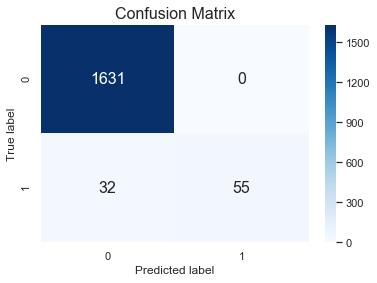

In [472]:
cr=classification_report(y_test,y_pred)
print(cr)
Color_Confusion_Matrix(y=y,y_test=y_test,y_pred=y_pred)

## b) 10 fold cross valdiation

In [473]:
cross_validation_accuracy(trial_05,X,y)

[0.97512003 0.97729258 0.97422455]
Accuracy of : 0.976 ± 0.003


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6458
           1       1.00      0.62      0.77       412

   micro avg       0.98      0.98      0.98      6870
   macro avg       0.99      0.81      0.88      6870
weighted avg       0.98      0.98      0.97      6870



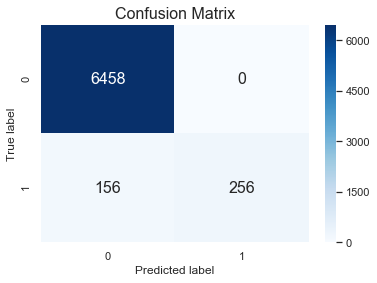

In [474]:
y_pred = cross_val_predict(trial_05, X, y, cv=10)
cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
Color_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

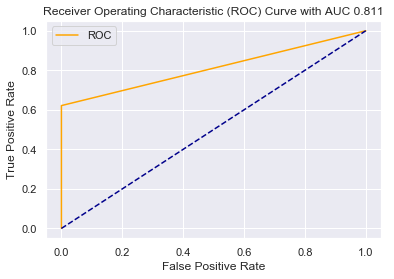

In [475]:
AUC = roc_auc_score(y,y_pred)  
fpr, tpr, thresholds = roc_curve(y,y_pred) 
plot_roc_curve(fpr,tpr,AUC)

As you see the results are improved by parameter tuning

# Parameter Tuning on SGD Classifier

In [476]:
param_grid_01= {
    'clf__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e-1, 1e2, 1e3], # learning rate
    'clf__max_iter': [1000], # number of epochs
    'clf__penalty': ['l2'],
    'clf__loss': ['hinge','log'],
    'clf__n_jobs': [-1],
     'clf__tol': [1e-4, 1e-3, 1e-2]
}
trial_05_01 = GridSearchCV(trial_05, param_grid=param_grid_01, cv=5, n_jobs=-1, verbose=2, scoring='f1')

In [477]:
trial_05_01.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   14.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'clf__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 0.1, 100.0, 1000.0], 'clf__max_iter': [1000], 'clf__penalty': ['l2'], 'clf__loss': ['hinge', 'log'], 'clf__n_jobs': [-1], 'clf__tol': [0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=2)

## Result of grid search over different parameters

In [478]:
results =pd.DataFrame(trial_05_01.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__alpha,param_clf__loss,param_clf__max_iter,param_clf__n_jobs,param_clf__penalty,param_clf__tol,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.201661,0.006289,0.042087,0.003535,0.0001,hinge,1000,-1,l2,0.0001,...,0.990650,0.007735,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.186900,0.006811,0.044282,0.004117,0.0001,hinge,1000,-1,l2,0.001,...,0.989024,0.010696,2,1.000000,1.000000,1.000000,1.000000,0.998073,0.999615,0.000771
2,0.180717,0.006950,0.040093,0.001163,0.0001,hinge,1000,-1,l2,0.01,...,0.987477,0.009485,3,1.000000,1.000000,1.000000,1.000000,0.998073,0.999615,0.000771
6,0.193682,0.005997,0.042087,0.002631,0.001,hinge,1000,-1,l2,0.0001,...,0.770466,0.031437,4,0.818182,0.844444,0.818182,0.826185,0.831461,0.827691,0.009778
7,0.190092,0.015574,0.041090,0.001716,0.001,hinge,1000,-1,l2,0.001,...,0.768479,0.023840,5,0.815490,0.836689,0.815490,0.823529,0.831461,0.824532,0.008489


# Using Best estimator to improve the model

In [479]:
clf_05_01=trial_05_01.best_estimator_

In [480]:
y_pred=train_predict(trial_05_01,X_train,y_train,X_test,y_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.0s finished


## Evaluation after parameter tuning

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1631
           1       0.99      0.94      0.96        87

   micro avg       1.00      1.00      1.00      1718
   macro avg       0.99      0.97      0.98      1718
weighted avg       1.00      1.00      1.00      1718



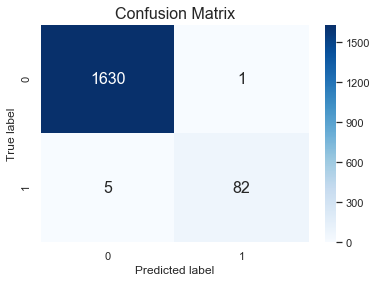

In [481]:
cr=classification_report(y_test,y_pred)
print(cr)
Color_Confusion_Matrix(y=y,y_test=y_test,y_pred=y_pred)

In [482]:
cross_validation_accuracy(clf_05_01,X,y)

[0.99781755 0.99825328 0.99781564]
Accuracy of : 0.998 ± 0.000


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6458
           1       1.00      0.98      0.99       412

   micro avg       1.00      1.00      1.00      6870
   macro avg       1.00      0.99      0.99      6870
weighted avg       1.00      1.00      1.00      6870



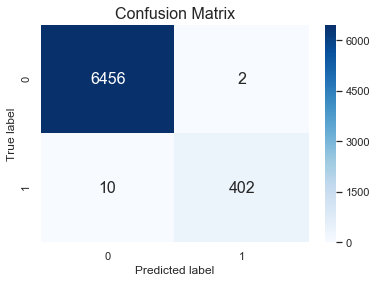

In [483]:
y_pred = cross_val_predict(clf_05_01, X, y, cv=5)
cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
Color_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

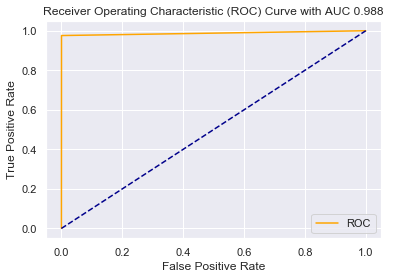

In [484]:
AUC = roc_auc_score(y,y_pred)  
fpr, tpr, thresholds = roc_curve(y,y_pred) 
plot_roc_curve(fpr,tpr,AUC)

# Training and Prediction by XGboost

In [485]:
y_pred=train_predict(trial_02,X_train,y_train,X_test,y_test)

# Evaluation

## a) train-test-split

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1631
           1       0.99      0.97      0.98        87

   micro avg       1.00      1.00      1.00      1718
   macro avg       0.99      0.98      0.99      1718
weighted avg       1.00      1.00      1.00      1718



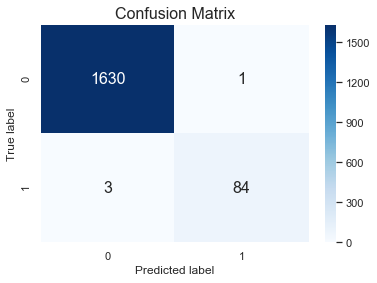

In [486]:
cr=classification_report(y_test,y_pred)
print(cr)
Color_Confusion_Matrix(y=y,y_test=y_test,y_pred=y_pred)

## b) 10 fold cross valdiation

In [487]:
cross_validation_accuracy(trial_02,X,y)

[0.99956351 0.99868996 0.99912626]
Accuracy of : 0.999 ± 0.001


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6458
           1       1.00      0.99      0.99       412

   micro avg       1.00      1.00      1.00      6870
   macro avg       1.00      0.99      1.00      6870
weighted avg       1.00      1.00      1.00      6870



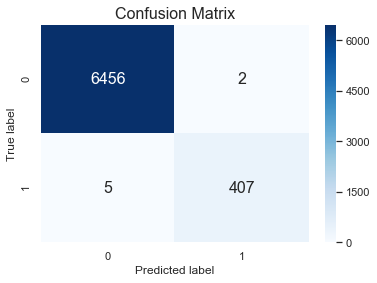

In [488]:
y_pred = cross_val_predict(trial_02, X, y, cv=10)
cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
Color_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

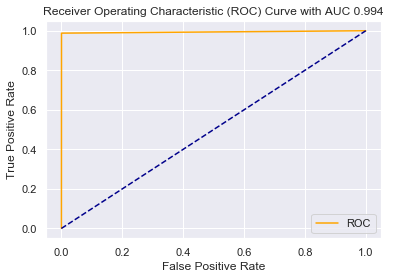

In [489]:
AUC = roc_auc_score(y,y_pred)  
fpr, tpr, thresholds = roc_curve(y,y_pred) 
plot_roc_curve(fpr,tpr,AUC)

In [490]:
y_pred=train_predict(trial_02,X_train,y_train,X_test,y_test)

We do not need any parameter tuning!

# Explaining prediction by SGD classifier using eli5

In [491]:
from eli5 import show_weights
show_weights(trial_05, top=30)

Weight?,Feature
+21.351,compare
+13.158,compared
+2.726,with
+2.187,predictions
+1.715,to
+1.620,and
+1.453,them
+1.422,values
+1.371,results
+1.300,those


In [492]:
index_0=list(np.where(y==0))
index_1=list(np.where(y==1))

In [493]:
idx_0=index_0[0].tolist();
idx_1=index_1[0].tolist();

# Explanation of classification by eli5 over SGDclassifier

In [494]:
import eli5
eli5.show_prediction(clf, X[idx_0[0]],vec=vec)

In [495]:
eli5.show_prediction(clf, X[idx_0[700]],vec=vec)

In [496]:
eli5.show_prediction(clf, X[idx_1[120]],vec=vec)

In [497]:
eli5.show_prediction(clf, X[idx_1[400]],vec=vec)